In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
data= pd.read_csv('house_properties_data.csv')
data = data.rename(columns={'operating cost':'operating_cost'})

In [3]:
# Sets values to 0 if they are 'None' or 'False' in the 'supplemental_area' column
data['supplemental_area'] = data['supplemental_area'].replace(['None','False'],0)

# Select rows that contain "None" in any column
df_to_drop = data[data.isin(["None"]).any(axis=1)]

# Drop the rows that contain "None" in any column
data = data.drop(df_to_drop.index)

# Replace entries in the form "YYYY - YYYY" with just the first year
data["build_year"] = data["build_year"].apply(lambda x: x.split(" - ")[0] if isinstance(x, str) and " - " in x else x)

In [4]:
# Converting all values except "adress" in data to numeric
data['longitude'] = data['longitude'].apply(lambda x: x.replace(' ', '').strip()).apply(pd.to_numeric)
data['latitude'] = data['latitude'].apply(lambda x: x.replace(' ', '').strip()).apply(pd.to_numeric)
data['living_area'] = data['living_area'].apply(lambda x: x.replace(' ', '').strip()).apply(pd.to_numeric)
data['land_area'] = data['land_area'].apply(lambda x: x.replace(' ', '').strip()).apply(pd.to_numeric)
data['supplemental_area'] = data['supplemental_area'].apply(lambda x: x.replace(' ', '').strip() if x is int else x).apply(pd.to_numeric)
data['number_of_rooms'] = data['number_of_rooms'].apply(lambda x: x.replace(' ', '').strip()).apply(pd.to_numeric)
data['build_year'] = data['build_year'].apply(lambda x: x.replace(' ', '').strip()).apply(pd.to_numeric)
data['operating_cost'] = data['operating_cost'].apply(lambda x: x.replace(' ', '').strip()).apply(pd.to_numeric)
data['sold_price'] = data['sold_price'].apply(lambda x: x.replace(' ', '').strip()).apply(pd.to_numeric)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2214 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adress             2214 non-null   object 
 1   longitude          2214 non-null   float64
 2   latitude           2214 non-null   float64
 3   living_area        2214 non-null   float64
 4   land_area          2214 non-null   float64
 5   supplemental_area  2214 non-null   float64
 6   patio              2214 non-null   int64  
 7   balcony            2214 non-null   int64  
 8   number_of_rooms    2214 non-null   float64
 9   build_year         2214 non-null   int64  
 10  operating_cost     2214 non-null   int64  
 11  sold_price         2214 non-null   int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 224.9+ KB


array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'living_area'}>],
       [<AxesSubplot: title={'center': 'land_area'}>,
        <AxesSubplot: title={'center': 'supplemental_area'}>,
        <AxesSubplot: title={'center': 'patio'}>],
       [<AxesSubplot: title={'center': 'balcony'}>,
        <AxesSubplot: title={'center': 'number_of_rooms'}>,
        <AxesSubplot: title={'center': 'build_year'}>],
       [<AxesSubplot: title={'center': 'operating_cost'}>,
        <AxesSubplot: title={'center': 'sold_price'}>, <AxesSubplot: >]],
      dtype=object)

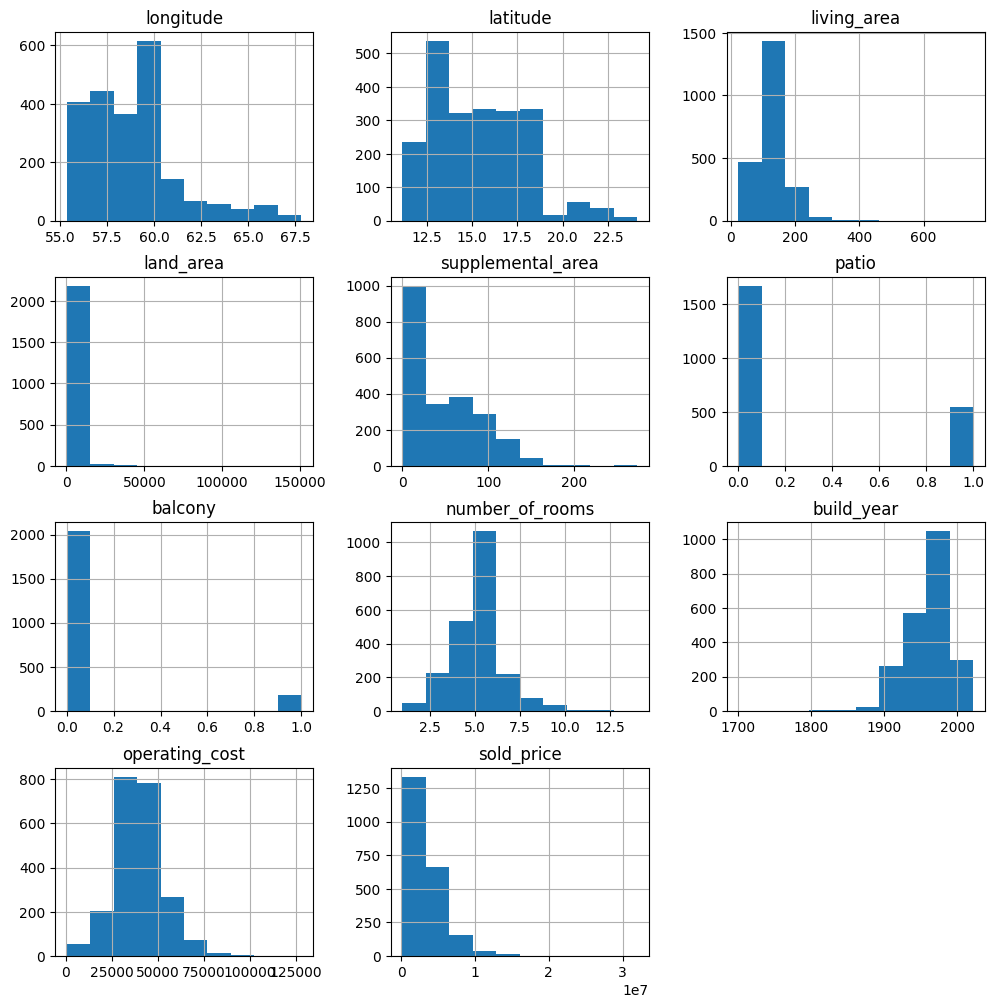

In [6]:
# inital data exploration
data.hist(figsize=(12,12))

C:\Users\Dan\AppData\Local\Temp\ipykernel_11724\1847237817.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True,cmap="YlGnBu")


<AxesSubplot: >

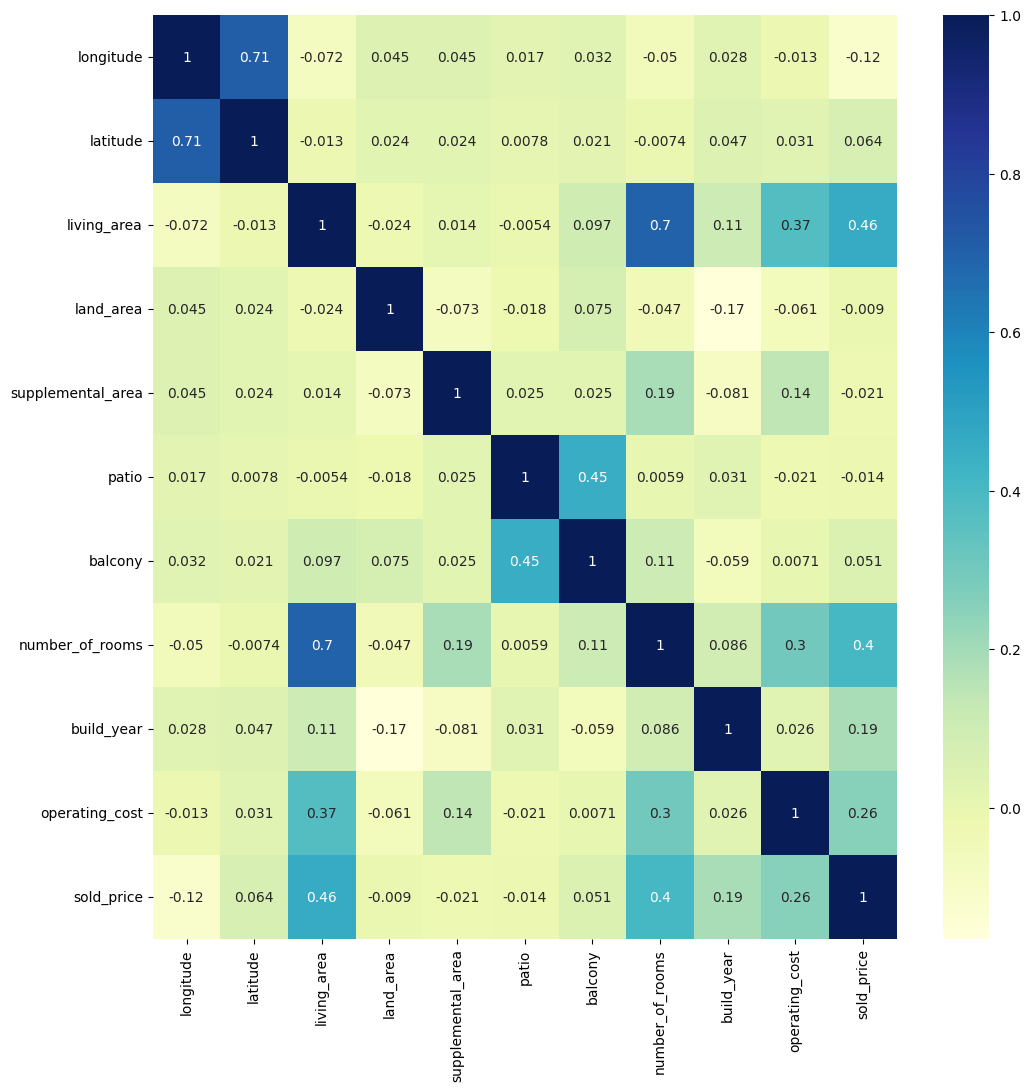

In [7]:
# inital data exploration
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True,cmap="YlGnBu")

C:\Users\Dan\AppData\Local\Temp\ipykernel_11724\1172136242.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True,cmap="YlGnBu")


<AxesSubplot: >

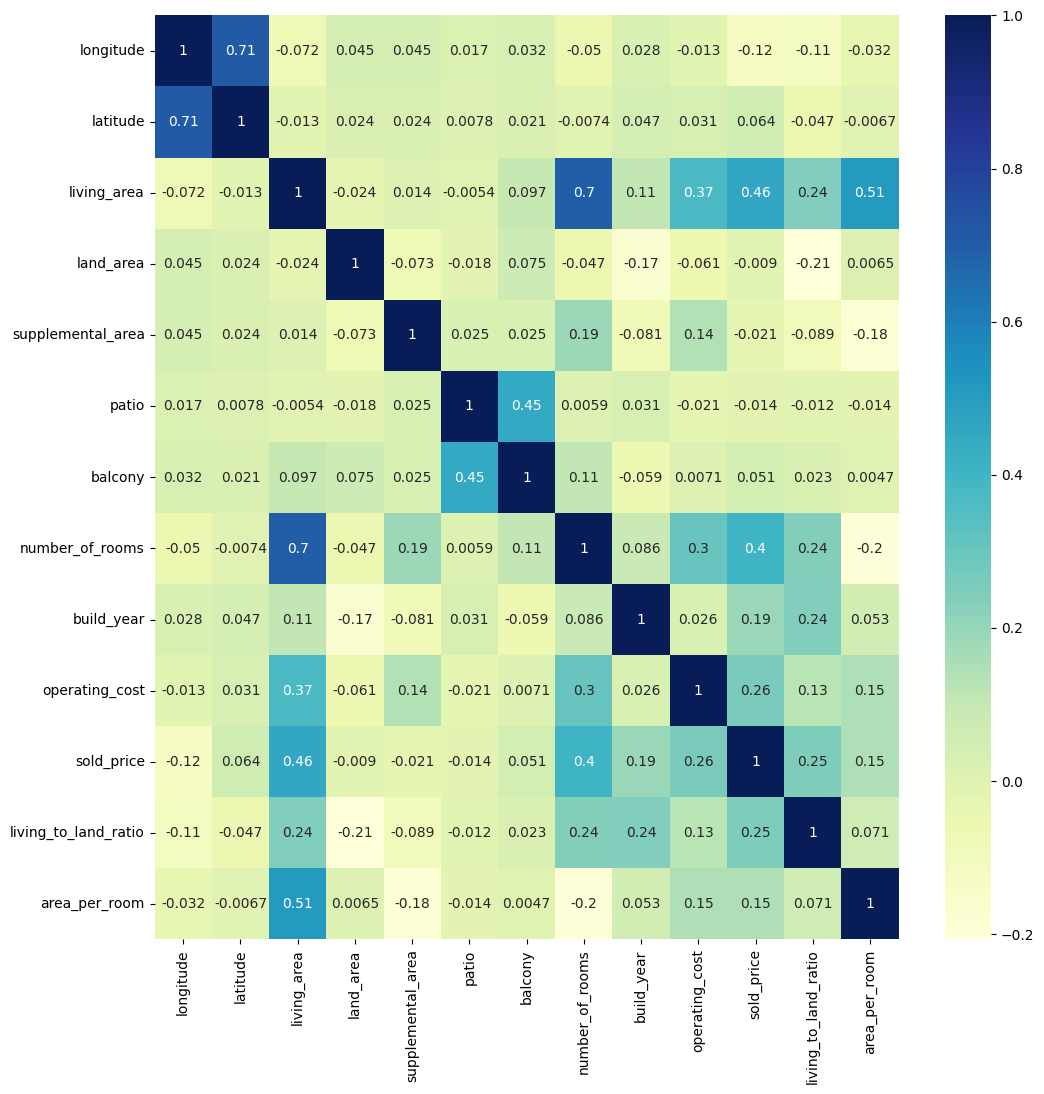

In [13]:
# Feature engineering
data['living_to_land_ratio'] = data['living_area']/data['land_area']
data['area_per_room'] = data['living_area']/data['number_of_rooms']
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True,cmap="YlGnBu")

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

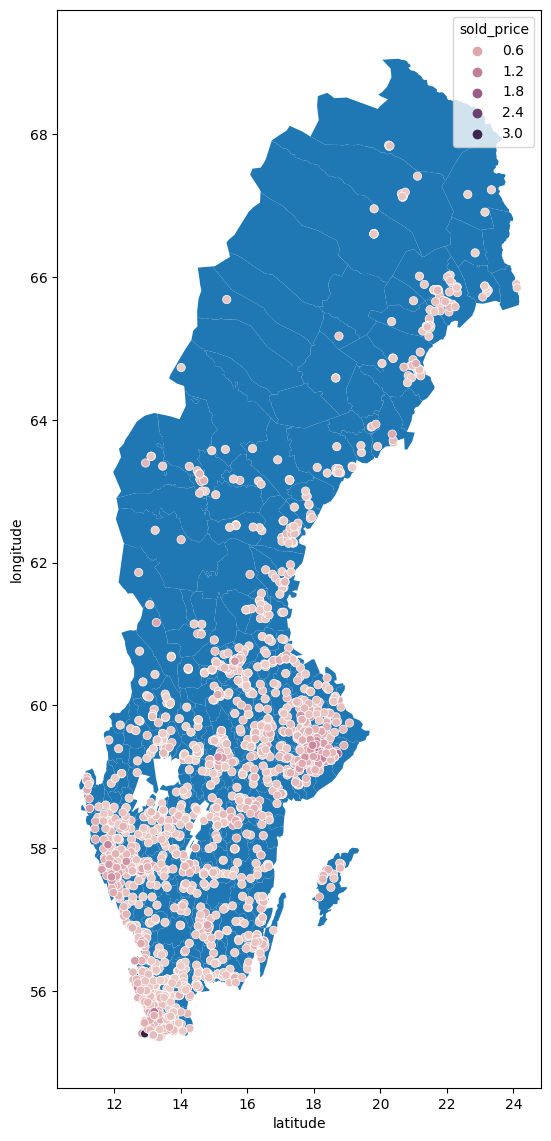

In [28]:
# Visualize the data over sweden

# Create a GeoDataFrame from the data points
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data["longitude"], data["latitude"]))

# Load a map of Sweden
sweden = gpd.read_file("sweden.geojson")

# Plot the map and the data points using Seaborn
sns.scatterplot(x="latitude", y="longitude", hue="sold_price", data=gdf, legend="auto", ax=sweden.plot(figsize=(14, 14)))

